## TP3 - Análisis exploratorio

El propósito de esta Notebook es explorar las imágenes de Coca Cola (las provistas por la cátedra más algunas otras) y sacar algunas conclusiones preliminares antes de realizar el template matching.

In [1]:
import cv2 as cv
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (6, 6)

import glob
import match_template as mt
import imagenes_util as img_util

### Visualización de las imágenes

**IMAGENES**

In [2]:
# Imágenes
image_names = glob.glob('images/*')
image_names.sort()
    
output = dict()

for image_name in image_names:
    img_name_short = image_name[7:]
    img = cv.imread(image_name,cv.IMREAD_COLOR)
    img_gray= cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img_edges = cv.Canny(img,40,105,L2gradient=True)

    # Para plotear pasamos la imagen a RGB
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    output[img_name_short] = img
    output[img_name_short + ' gray'] = img_gray
    output[img_name_short + ' edges'] = img_edges


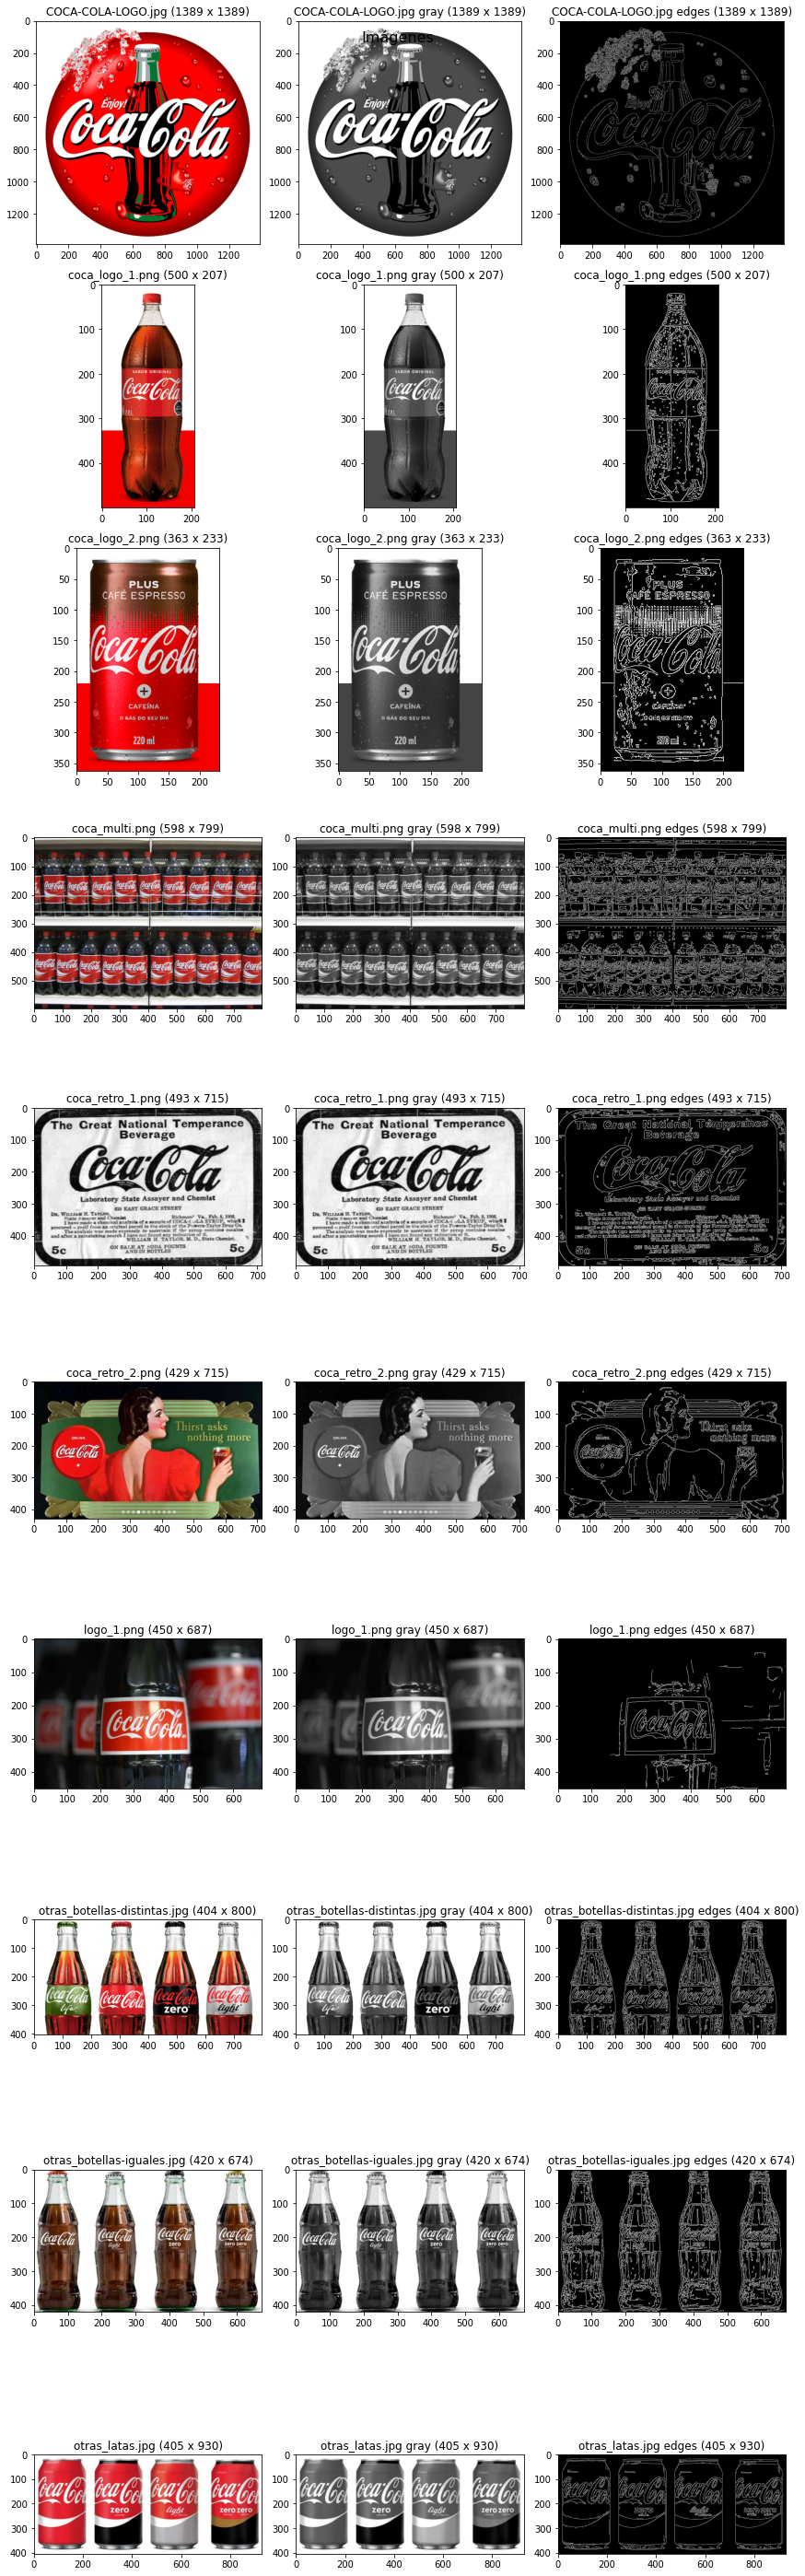

In [3]:
img_util.plot_set_imagenes(output, f'Imágenes', columnas = 3)

**TEMPLATE**

Text(0.5, 1.0, 'Template inv (175 x 400)')

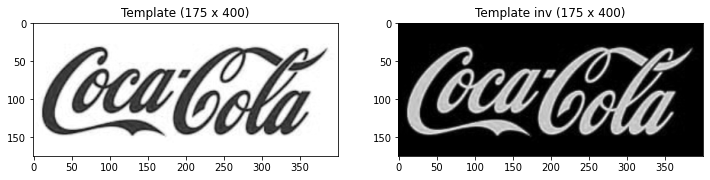

In [4]:
# Template
plt.figure(figsize=[12, 6])

titulo = f'Template ({mt.template.shape[0]} x {mt.template.shape[1]})'
plt.subplot(121); plt.imshow(mt.template, cmap='gray'); plt.title(titulo)

titulo = f'Template inv ({mt.template_inv.shape[0]} x {mt.template_inv.shape[1]})'
plt.subplot(122); plt.imshow(mt.template_inv, cmap='gray'); plt.title(titulo)


### Observaciones
- Las imágenes tienen tamaños muy diferentes entre sí
- La escala del logo es diferente para cada imagen
- En la mayoría de las imágenes el logo es blanco sobre color oscuro, a diferencia del template que es negro sobre blanco.
- La mayoría de las imágenes son más grandes que el template, con excepción de coca_logo_1 y coca_logo_2 que son más angostas.
